# GA(遺傳演算法)-eil51

## Core

In [1]:
# coding: utf-8
import sys
import time
import math
import random

# For GA
def mutation(c,rate_level):
    doMutation = random.randint(1,100)
    if(doMutation<= rate_level):
        c = c.copy()
        sw1 = random.randint(1,len(c)) - 1
        sw2 = random.randint(1,len(c)) - 1
        c1 = c[sw1]
        c2 = c[sw2]
        c[sw1] = c2
        c[sw2] = c1
        return c
    return c

def findRepeat(chromosome,num_cities):
    # 找到重複值
    rep = []
    for i in range(num_cities):
        key = i+1
        try:
            if(chromosome[key] == 2):
                rep.append(key)
        except:
            continue
    return rep

def returnBack(chromosome_repeat_list,chromosome):
    # 找到重複值index
    indexs = []
    for target in chromosome_repeat_list:
        for j in range(len(chromosome),0,-1):
            jIndex = j -1
            if chromosome[jIndex] == target:
                indexs.append(jIndex)
                break
    return indexs

def swapBack(c1,c1rb,c2,c2rb):
    # 復位實現
    c1 = c1.copy()
    c2 = c2.copy()
    c1_copy = c1.copy()
    c2_copy = c2.copy()
    for i in range(len(c1rb)):
        c1[c1rb[i]] = c2_copy[c2rb[i]]
        c2[c2rb[i]] = c1_copy[c1rb[i]]
    return (c1,c2)

# From E.G.
def loadDic(dicPath = './eil51.txt'):
    dic={}
    with open(dicPath) as f:
        r=f.read()
        read_line = r.split('\n')              
        
        for i in range(len(read_line)):         
            read_element = read_line[i].split()
            dic[int(read_element[0])] = [int(read_element[1])]
            dic[int(read_element[0])].append(int(read_element[2]))
        
        f.close()
    return dic

def ran(domain): # generate two numbers  that in range to  swap  (ex: if answer is [4,7] means city 4 and city 7 seq. order swap)
    num = []
    first = random.randint(1,domain)
    num.append(first)
    second = random.randint(1,domain)
    ok = 0
    while(ok==0):
        if second != first:
            num.append(second)
            ok = 1
        else:
            second = random.randint(1,domain)
            ok = 0
    return num

def init(num): ## generate init city sequence
    seq = []
    while len(seq) < num:
        temp = random.randint(1,num)
        if temp not in seq:
            seq.append(temp)
            
    return seq

def trans(seq):
    ok_flag=0
    temp = seq[:]
    index = ran(len(seq))
    
    while (ok_flag ==0) : 
        if index[0]!=index[1]:
            ok_flag =1
        else:
            index = ran(len(seq))
        
        
    t = temp[index[0]-1]
    temp[index[0]-1] = temp[index[1]-1]
    temp[index[1]-1] = t
    
    return temp

def distance(axis):
    return math.sqrt(axis[0]*axis[0]+axis[1]*axis[1])

def evalu(seq,dic):
    # 計算seq path 距離
    dist = 0
    for i in range(len(seq)):
        d = [ dic[seq[i]][0]-dic[seq[(i+1)%len(seq)]][0],dic[seq[i]][1]-dic[seq[(i+1)%len(seq)]][1]]
        dist += distance(d)
    return dist

def determine(temp,min_seq,dic):
    if evalu(temp,dic) < evalu(min_seq,dic):
        min_seq = temp[:]
  
    return min_seq,evalu(min_seq,dic)
    
            
def readfile(dic):
    with open('eil51.txt') as f:
        r = f.read()
        read_line = r.split('\n')               
        for i in range(len(read_line)):         
            read_element = read_line[i].split()
            dic[int(read_element[0])] = [int(read_element[1])]
            dic[int(read_element[0])].append(int(read_element[2]))
        f.close()

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random

def showPlot(PATH_SEQ,title):
    # load
    DIC = loadDic()
    with open('./eil51.txt','r') as f:
        eil51 = f.read()
    eil51 = eil51.split("\n")

    # x y
    x=[]
    y=[]
    for i in eil51:
        newi = i.split(" ")
        x.append(int(newi[1]))
        y.append(int(newi[2]))

    myX = []
    myY = []
    myPath = PATH_SEQ
    for i in myPath:
        _x,_y = DIC[i]
        myX.append(_x)
        myY.append(_y)
    
    # matplotlib.rcParams['axes.unicode_minus'] = False
    fig, ax = plt.subplots()
    ax.plot(x, y, 'o')
    ax.set_title(title)
    plt.plot(myX,myY)
    plt.show()

## Main

In [3]:
import random
from collections import Counter
import copy
#initial   
NUM_CITIES =51
DIC = loadDic()
ITER_NUM = 2500
INITIAL_POPULATION_NUM = 8
CROSSOVER_LEN = 4
MOUTATION_LEVEL = 25 # 10(%) = 0.1

valRec = []
if __name__ == '__main__':
    # generate initial population
    chromosomes = []

    for i in range(INITIAL_POPULATION_NUM):
        chromosomes.append(init(NUM_CITIES))
        c = chromosomes[i]
        print("chromosomes"+str(i),c)
        print("value:",evalu(c,DIC))
    print()

    for NOW_ITER in range(ITER_NUM):
        parentsChromosomes = copy.deepcopy(chromosomes)        
        splitPointStart = random.randint(0,NUM_CITIES - CROSSOVER_LEN)
        splitPointEnd = splitPointStart + CROSSOVER_LEN
        # print("Round:"+str(NOW_ITER))
        
        # 打亂
        random.shuffle(chromosomes)

        # 交配
        for i in range(0,INITIAL_POPULATION_NUM,2):
            # 取出基因
            c1 = chromosomes[i].copy()
            c2 = chromosomes[i+1].copy()
            # 得到切片
            c1Split = c1[splitPointStart:splitPointEnd]
            c2Split = c2[splitPointStart:splitPointEnd]
            # 交換切片
            c1[splitPointStart:splitPointEnd] = c2Split.copy()
            c2[splitPointStart:splitPointEnd] = c1Split.copy()
            # 復位
            c1d = dict(Counter(c1))
            c2d = dict(Counter(c2))
            
            c1r = findRepeat(c1d,NUM_CITIES)
            c2r = findRepeat(c2d,NUM_CITIES)
            
            c1rb = returnBack(c1r,c1)
            c2rb = returnBack(c2r,c2)

            c1,c2 = swapBack(c1,c1rb,c2,c2rb)
            chromosomes[i] = c1.copy()
            chromosomes[i+1] = c2.copy()
        
        # 得到交配完成chromosomes
        childChromosomes = copy.deepcopy(chromosomes)
        chromosomes = []
        chromosomes = parentsChromosomes+childChromosomes

        # 突變
        for i,c in enumerate(chromosomes):
            newC = mutation(c,MOUTATION_LEVEL) 
            chromosomes[i] = newC
        
        # 排序結果
        chromosomesObjs = []
        for c in chromosomes:
            chromosomesObjs.append((c,evalu(c,DIC)))
        chromosomesObjs.sort(key = lambda x:x[1],reverse=False)
        
        # 選出下一代
        chromosomes = []
        for i,c in enumerate(chromosomesObjs):            
            chromosomes.append(c[0])        
        chromosomes = chromosomes[0:INITIAL_POPULATION_NUM]
        
        valRec.append(evalu(chromosomes[0],DIC))

chromosomes0 [6, 16, 45, 44, 9, 18, 10, 8, 37, 23, 4, 2, 28, 46, 22, 47, 20, 39, 15, 19, 12, 48, 3, 32, 41, 14, 43, 51, 50, 33, 11, 7, 27, 49, 1, 36, 34, 13, 30, 31, 24, 38, 5, 40, 29, 17, 42, 21, 25, 35, 26]
value: 1708.8063888075387
chromosomes1 [31, 45, 19, 44, 30, 23, 34, 1, 3, 39, 48, 7, 22, 41, 38, 40, 14, 16, 13, 50, 43, 11, 20, 25, 32, 27, 8, 15, 35, 24, 6, 49, 51, 37, 42, 10, 36, 29, 26, 18, 21, 12, 9, 47, 17, 4, 2, 28, 46, 33, 5]
value: 1731.0279368015943
chromosomes2 [2, 14, 30, 26, 34, 44, 18, 39, 11, 31, 6, 29, 10, 7, 50, 45, 36, 25, 22, 40, 35, 51, 38, 1, 23, 28, 15, 13, 49, 27, 16, 47, 8, 41, 24, 21, 37, 46, 19, 48, 20, 12, 33, 9, 43, 42, 17, 5, 4, 3, 32]
value: 1879.7222773065591
chromosomes3 [23, 39, 43, 21, 15, 31, 6, 13, 18, 33, 35, 37, 16, 47, 46, 22, 9, 4, 50, 2, 19, 1, 5, 42, 48, 8, 3, 10, 36, 17, 24, 26, 14, 34, 41, 40, 20, 27, 49, 7, 45, 29, 12, 11, 30, 25, 32, 38, 28, 44, 51]
value: 1843.1412809257836
chromosomes4 [2, 47, 22, 33, 49, 42, 11, 28, 25, 41, 31, 23,

## Plot and RES

FINAL PATH:
 [49, 10, 45, 15, 44, 42, 19, 18, 24, 43, 7, 23, 14, 25, 13, 41, 40, 33, 39, 30, 34, 9, 38, 5, 12, 37, 17, 4, 47, 46, 51, 27, 6, 48, 8, 26, 31, 28, 22, 3, 36, 35, 20, 29, 21, 50, 16, 2, 1, 32, 11]
FINAL VAL:
 517.933217336975


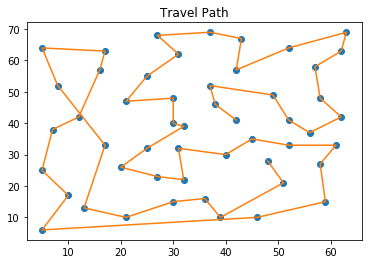

In [4]:
print("FINAL PATH:\n",chromosomes[0])
print("FINAL VAL:\n",evalu(chromosomes[0],DIC))
showPlot(chromosomes[0],'Travel Path')

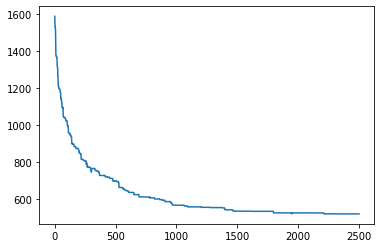

In [5]:
plt.plot(valRec)
plt.show()